# Start by loading in the infrastructure

We'll primarily be using Numpy and MatPlotLib

In [1]:
# Call in the packages we'll be using for creating figures
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Making a plot with our own data file

First, we will populate **x** and **y** lists with the data from our file using the CSV package.

My file uses tabs (**\t**) to separate values, so the delimiter is set as such. If you are using comma separated variables (i.e. 3.65, 9.33, 14,31 ...) the delimiter would be **','** however that is the default while using the CSV package and unnecessary to include. Other options include: spaces (**' '**) and colons (**':'**).

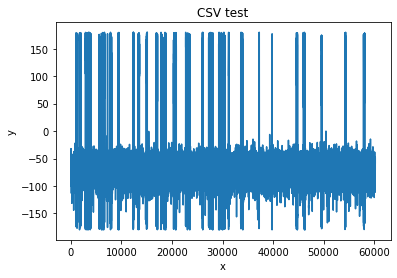

In [2]:
import csv

# Creation of empty lists for the x and y data
x, y = [], []

# Population of lists from our data file
with open('C4-C5-N1-C10.dihedral.raw', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        x.append(float(row[0]))
        y.append(float(row[1]))

# Plotting our data
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('CSV test')
plt.show()

# This time we will try using Numpy to unload the data

While Numpy uses less code, each package has its benefits, so you'll have to decide which you prefer

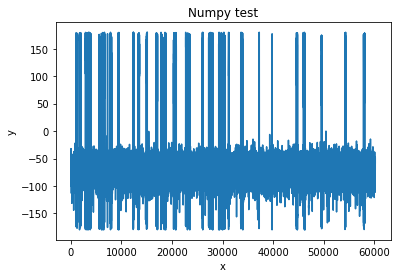

In [3]:
# Autopopulation of lists from our data file
x, y = np.loadtxt('C4-C5-N1-C10.dihedral.raw', delimiter='\t', unpack=True)
plt.plot(x,y)

# Plotting the data
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numpy test')
plt.show()

# Now we'll transform the dataset into a histogram

First, we'll define the number of bins we wish to divide our data into. My data is is angles from -180 to 180 degrees, so decide how many bins you want to divide the histogram into. Try using 10, 20, 45, 90, 180

In [4]:
# Using a user-based input to create variables in your data
num_bins = int(input('How many bins will you divide the data into?  '))

How many bins will you divide the data into?  120


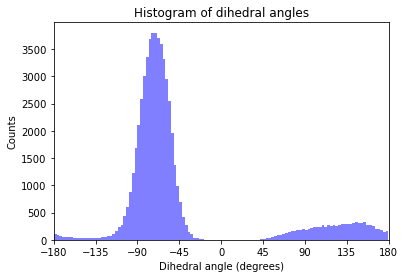

In [5]:
# Population of data for a histogram
# 'n' is the array of data
# 'bins' is how many bins your histogram is separated into
# 'patches' is for the aesthetics of the figure
n, bins, patches = plt.hist(y, num_bins, facecolor='blue', alpha=0.5)

# Setting the axes and labels
plt.xlabel('Dihedral angle (degrees)')
plt.ylabel('Counts')
plt.xlim(-175,180)
plt.xticks(np.arange(-180,181, step=45))
plt.title('Histogram of dihedral angles')
plt.show()

# Now let's normalize the data to create a probability function

It's simple as adding the **density=1** option to the **plt.hist** command

Feel free to change the number of bins you'd like to divide the data into

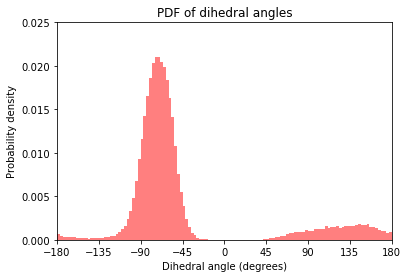

In [6]:
n, bins, patches = plt.hist(y, num_bins, density=1, facecolor='red', alpha=0.5)

plt.xlabel('Dihedral angle (degrees)')
plt.ylabel('Probability density')
plt.xlim(-175,180)
plt.ylim(0, 0.025)
plt.xticks(np.arange(-180,181, step=45))
plt.title('PDF of dihedral angles')
plt.show()

# The PDF is best used in conjunction with a CDF

For this, we simply add the option **cumulative=True** option to the plt.hist command. To leave the lineplot unfilled, we use the **histtype='step'** option as well. You can also use this with your PDF if you choose.

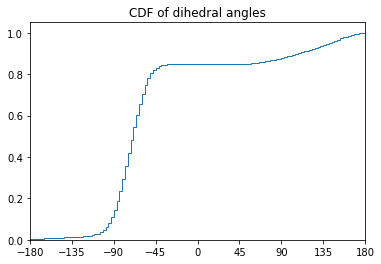

In [7]:
n, bins, patches = plt.hist(y, num_bins, density=1, histtype='step', cumulative=True)

plt.xlim(-175,180)
plt.xticks(np.arange(-180,181, step=45))
plt.title('CDF of dihedral angles')
plt.show()

# Finally, we'll merge the pdf and cdf into a single overlayed figure

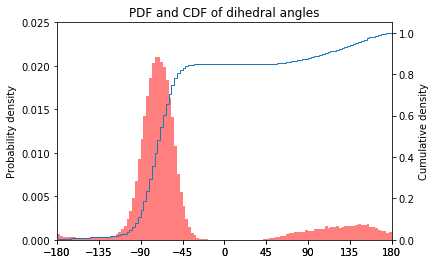

In [18]:
from pylab import figure, show, legend, ylabel

# Creating the whole figure
fig1 = figure()

# Creating the first subplot and traits of the first subplot
ax1 = fig1.add_subplot(111)
n, bins, patches = ax1.hist(y, num_bins, density=1, facecolor='red', alpha=0.5)
ylabel("Probability density")
plt.ylim(0, 0.025)
plt.xlim(-175,180)
plt.xticks(np.arange(-180,181, step=45))

# Creating the second subplot and traits of the second subplot
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax2.hist(y, num_bins, density=1, histtype='step', cumulative=True)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Cumulative density")

# Creating shared traits of the figure
plt.title("PDF and CDF of dihedral angles")
plt.show()